In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Importing data and changing axis for later join
basics = pd.read_csv("zippedData/imdb.title.basics.csv.gz")
basics.set_index("tconst", inplace = True)
basics = basics.drop("original_title", axis=1)
basics

,primary_title,start_year,runtime_minutes,genres
tconst,,,,
tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...
tt9916538,Kuambil Lagi Hatiku,2019,123.0,Drama
tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
tt9916706,Dankyavar Danka,2013,NaN,Comedy


In [3]:
# Importing data and changing axis for later join
ratings = pd.read_csv("zippedData/imdb.title.ratings.csv.gz")
ratings.set_index("tconst", inplace = True)
ratings

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21
...,...,...
tt9805820,8.1,25
tt9844256,7.5,24
tt9851050,4.7,14


In [4]:
# Importing data and changing axis for later join
names = pd.read_csv("zippedData/imdb.name.basics.csv.gz")
#Dropping unneccesary data
names = names.drop(["birth_year", "death_year", "primary_profession", "known_for_titles"], axis=1)
names.set_index("nconst", inplace = True)
names

,primary_name
nconst,
nm0061671,Mary Ellen Bauder
nm0061865,Joseph Bauer
nm0062070,Bruce Baum
nm0062195,Axel Baumann
nm0062798,Pete Baxter
...,...
nm9990381,Susan Grobes
nm9990690,Joo Yeon So
nm9991320,Madeline Smith


In [5]:
#Importing crew data
directors = pd.read_csv("zippedData/imdb.title.crew.csv.gz")
#exploding directors column
directors = directors.set_index(['tconst', 'writers']).apply(lambda x: x.str.split(',').explode()).reset_index()
#dropping writers column
directors = directors.drop("writers", axis=1).dropna()
#setting index for later merge
directors.set_index("directors", inplace = True)
#directors = directors.drop_duplicates()
directors

,tconst
directors,
nm0899854,tt0285252
nm1940585,tt0462036
nm0151540,tt0835418
nm0089502,tt0878654
nm2291498,tt0878654
...,...
nm10122357,tt8999974
nm6711477,tt9001390
nm10123242,tt9001494


In [6]:
# Importing data and changing axis for later join
budgets = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
budgets.set_index("title", inplace = True)
budgets

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...
The Quake,Magn.,6200.0,NaN,2018
Edward II (2018 re-release),FM,4800.0,NaN,2018
El Pacto,Sony,2500.0,NaN,2018


In [7]:
# Importing data and changing axis for later join
altbudgets = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
altbudgets.set_index("movie", inplace = True)
altbudgets

,id,release_date,production_budget,domestic_gross,worldwide_gross
movie,,,,,
Avatar,1,"Dec 18, 2009","$425,000,000","$760,507,625","$2,776,345,279"
Pirates of the Caribbean: On Stranger Tides,2,"May 20, 2011","$410,600,000","$241,063,875","$1,045,663,875"
Dark Phoenix,3,"Jun 7, 2019","$350,000,000","$42,762,350","$149,762,350"
Avengers: Age of Ultron,4,"May 1, 2015","$330,600,000","$459,005,868","$1,403,013,963"
Star Wars Ep. VIII: The Last Jedi,5,"Dec 15, 2017","$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
Red 11,78,"Dec 31, 2018","$7,000",$0,$0
Following,79,"Apr 2, 1999","$6,000","$48,482","$240,495"
Return to the Land of Wonders,80,"Jul 13, 2005","$5,000","$1,338","$1,338"


In [8]:
#Joining rating with basic movie info
mergedinfo=basics.join(ratings)
mergedinfo

,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,
tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43.0
tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...
tt9916538,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
tt9916706,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN


In [9]:
#Joining director list with name data
director_movies = directors.join(names, how="left").reset_index()
#Setting index for join
director_movies = director_movies.set_index("tconst")
director_movies = director_movies.rename(columns={"primary_name":"Director", "index":"nconst"})
#Joining the previously joined basic/rating data with the director names
director_movies = director_movies.join(mergedinfo)
director_movies

,nconst,Director,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,,
tt0063540,nm0712540,Harnam Singh Rawail,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
tt0066787,nm0002411,Mani Kaul,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43.0
tt0069049,nm0000080,Orson Welles,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
tt0069204,nm0611531,Hrishikesh Mukherjee,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
tt0100275,nm0749914,Raoul Ruiz,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
tt9916622,nm9272491,Ana Célia de Oliveira,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
tt9916706,nm7764440,Kanchan Nayak,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN
tt9916730,nm10538612,Kiran Gawade,6 Gunn,2017,116.0,NaN,NaN,NaN


In [10]:
#joining rating data with gross data
ratingvsgross = pd.DataFrame(mergedinfo)
ratingvsgross = ratingvsgross.set_index("primary_title")
ratingvsgross = budgets.join(ratingvsgross, how="inner")
#Dropping irrelevant data
ratingvsgross = ratingvsgross.drop(["studio", "year", "start_year", "runtime_minutes", "genres"], axis = 1)
ratingvsgross

,domestic_gross,foreign_gross,averagerating,numvotes
'71,1300000.0,355000,7.2,46103.0
"1,000 Times Good Night",53900.0,NaN,7.1,6848.0
10 Cloverfield Lane,72100000.0,38100000,7.2,260383.0
10 Years,203000.0,NaN,6.1,22484.0
1001 Grams,11000.0,NaN,6.3,1301.0
...,...,...,...,...
Zindagi Na Milegi Dobara,3100000.0,NaN,8.1,58912.0
Zombeavers,14900.0,NaN,4.8,14825.0
Zookeeper,80400000.0,89500000,5.2,52396.0
Zoolander 2,28800000.0,27900000,4.7,59914.0


In [11]:
#This section explodes the genre column to find average rating across genres later
mergedinfo=basics.join(ratings) #See below
splitgenres = pd.DataFrame(data=mergedinfo)
splitgenres["genres"] = splitgenres["genres"].str.split(",") #For reasons I do not understand and cannot comprehend
#this line alters mergedinfo instead of splitgenres which causes errors when this cell is run more than once so I
#have to redefine mergedinfo at the start and end of the process. I have given up on finding another solution.
splitgenres = splitgenres.explode("genres")
mergedinfo=basics.join(ratings) #See above
splitgenres

,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,
tt0063540,Sunghursh,2013,175.0,Action,7.0,77.0
tt0063540,Sunghursh,2013,175.0,Crime,7.0,77.0
tt0063540,Sunghursh,2013,175.0,Drama,7.0,77.0
tt0066787,One Day Before the Rainy Season,2019,114.0,Biography,7.2,43.0
tt0066787,One Day Before the Rainy Season,2019,114.0,Drama,7.2,43.0
...,...,...,...,...,...,...
tt9916538,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
tt9916706,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN


In [12]:
#Dropping NaNs/duplicates and grouping by average averagerating
genre_rating = pd.DataFrame(splitgenres.dropna(subset=["averagerating"]).drop_duplicates().groupby("genres")[["averagerating","numvotes"]].mean())
#Dropping genres with less than 1000 averave votes to eliminate outliers
genre_rating = genre_rating.drop(genre_rating[genre_rating.numvotes < 1000].index)
#Dropping numvotes column and sorting values for pretty graph
genre_rating = genre_rating.drop("numvotes", axis=1)
genre_rating = genre_rating.sort_values("averagerating")
genre_rating

,averagerating
genres,
Horror,5.003440
Sci-Fi,5.489755
Thriller,5.639114
Action,5.810361
Western,5.868214
Fantasy,5.919473
Mystery,5.920401
Comedy,6.002689
Crime,6.115441


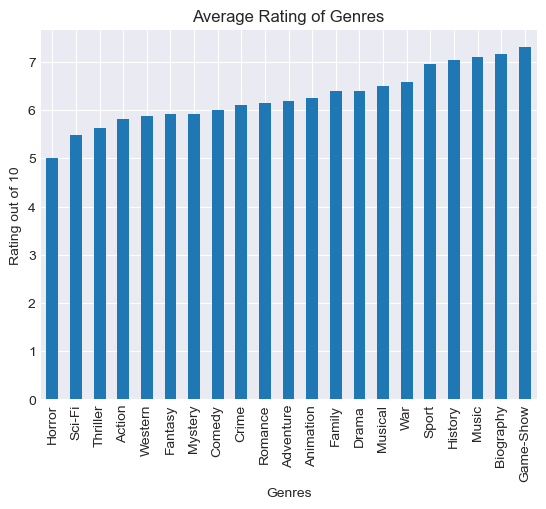

In [13]:
#Pretty graph
plt.style.use('seaborn-darkgrid')
genre_rating.plot.bar(title = "Average Rating of Genres",
                      xlabel = "Genres",
                      ylabel = "Rating out of 10",
                      legend=False);

In [14]:
#Drops NaNs, then drops duplicates, then groups the directors by the average rating of movies they've worked on 
#then drops any director with less than 50000 average ratings per movie to display only most pristine of directors
#and also eliminate outliers
director_rating = pd.DataFrame(director_movies.dropna(subset=["averagerating"]).drop_duplicates().groupby("Director")[["averagerating", "numvotes"]].mean())
director_rating = director_rating.drop(director_rating[director_rating.numvotes < 50000].index)
director_rating = director_rating.sort_values("averagerating", ascending=False)
#Prettying up the headers
director_rating = director_rating.rename(columns={"averagerating":"Average Rating", "numvotes":"Number of Votes"})
director_rating.head(20)

,Average Rating,Number of Votes
Director,,
Quentin Tarantino,8.675000,4.138442e+05
Bob Persichetti,8.500000,2.108690e+05
Rodney Rothman,8.500000,2.108690e+05
Christopher Nolan,8.425000,1.248687e+06
Adrian Molina,8.400000,2.771940e+05
Lee Unkrich,8.350000,4.797060e+05
Anthony Russo,8.225000,5.904550e+05
Ronnie Del Carmen,8.200000,5.361810e+05
Malik Bendjelloul,8.200000,5.865400e+04


In [15]:
#data cleaning
dom_gross_rating = pd.DataFrame(ratingvsgross.drop("foreign_gross", axis=1))
dom_gross_rating = dom_gross_rating.dropna().drop_duplicates()
#once again dropping values below a vote threshold for the sake of data visibility
dom_gross_rating = dom_gross_rating.drop(dom_gross_rating[dom_gross_rating.numvotes < 100000].index)
dom_gross_rating = dom_gross_rating.sort_values("numvotes", ascending=False)
dom_gross_rating

,domestic_gross,averagerating,numvotes
Inception,292600000.0,8.8,1841066.0
The Dark Knight Rises,448100000.0,8.4,1387769.0
Interstellar,188000000.0,8.6,1299334.0
Django Unchained,162800000.0,8.4,1211405.0
The Wolf of Wall Street,116900000.0,8.2,1035358.0
...,...,...,...
Bad Moms,113300000.0,6.2,100952.0
Carol,12700000.0,7.2,100680.0
Sex Tape,38500000.0,5.1,100520.0
Pompeii,23200000.0,5.5,100467.0


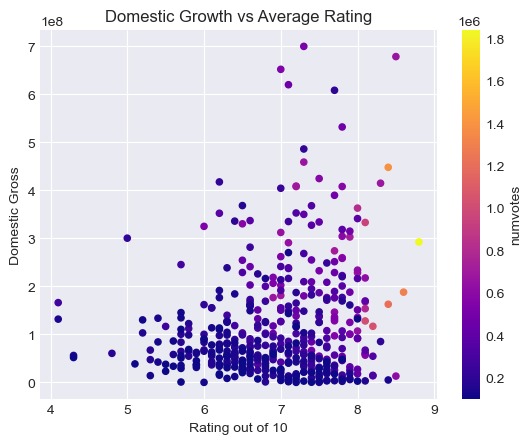

In [16]:
#Pretty graph
dom_gross_rating.plot.scatter("averagerating", "domestic_gross",
                              c = 'numvotes',
                              colormap = 'plasma',
                              title = "Domestic Growth vs Average Rating",
                              xlabel = "Rating out of 10",
                              ylabel = "Domestic Gross"
                              );

In [17]:
#cleaning
runtime = pd.DataFrame(mergedinfo).dropna(subset=["runtime_minutes"]).dropna(subset=["averagerating"])
#Cutting out anything longer than the Titanic
runtime = runtime.drop(runtime[runtime.runtime_minutes > 210].index)
#And anything shorter than an hour
runtime = runtime.drop(runtime[runtime.runtime_minutes < 60].index)
#And anything with too few votes
runtime = runtime.drop(runtime[runtime.numvotes < 10000].index)
runtime = runtime.sort_values("numvotes", ascending=False)
#I had to do this to get the graph to work, don't ask me why
runtime = runtime.rename(columns={"averagerating":"Average Rating", "runtime_minutes":"Runtime (Minutes)"})


runtime

,primary_title,start_year,Runtime (Minutes),genres,Average Rating,numvotes
tconst,,,,,,
tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0
tt1345836,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769.0
tt0816692,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334.0
tt1853728,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405.0
tt0848228,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655.0
...,...,...,...,...,...,...
tt1422020,Dog Pound,2010,91.0,Drama,7.0,10025.0
tt1657299,The Decoy Bride,2011,89.0,"Comedy,Drama,Romance",6.2,10018.0
tt6097798,Radius,2017,93.0,"Sci-Fi,Thriller",6.2,10008.0


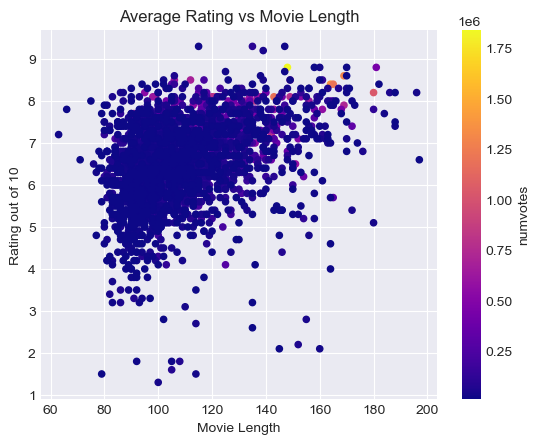

In [18]:
runtime.plot.scatter("Runtime (Minutes)", "Average Rating",
                              c = 'numvotes',
                              colormap = 'plasma',
                              title = "Average Rating vs Movie Length",
                              xlabel = "Movie Length",
                              ylabel = "Rating out of 10"
                              );